In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [ ]:
# upload CSV file
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (2).csv


In [ ]:
# read the dataset
df = pd.read_csv('car data.csv')


In [ ]:
#  explore data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

  Car_Name  Year  Selling_Price  ...  Selling_type  Transmission Owner
0     ritz  2014           3.35  ...        Dealer        Manual     0
1      sx4  2013           4.75  ...        Dealer        Manual     0
2     ciaz  2017           7.25  ...        Dealer        Manual     0
3  wagon r  2011           2.85  ...        Dealer        Manual     0
4    swift  2014           4.60  ...        Dealer        Manual     0

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Own

In [ ]:
# rename columns to standard names
df.rename(columns={
    'Selling_Price': 'selling_price',
    'Present_Price': 'present_price',
    'Driven_kms': 'kms_driven',
    'Fuel_Type': 'fuel',
    'Selling_type': 'seller_type',
    'Transmission': 'transmission',
    'Owner': 'owner'
}, inplace=True)

In [ ]:
# Add car feature
df['car_age'] = 2025 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

In [ ]:
# Encode categorial columns
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])


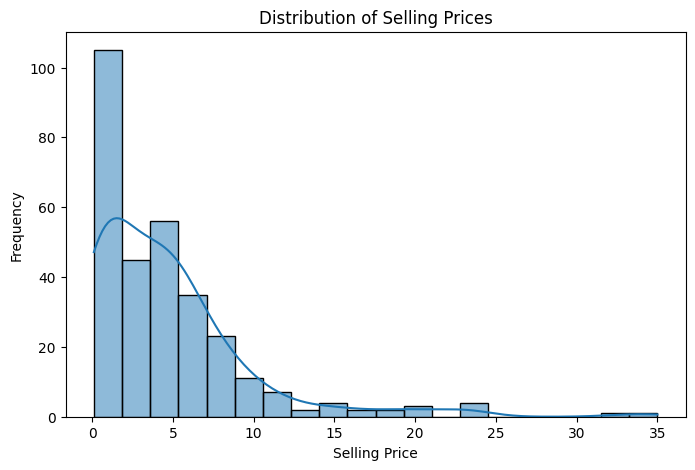

In [ ]:
# Selling Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

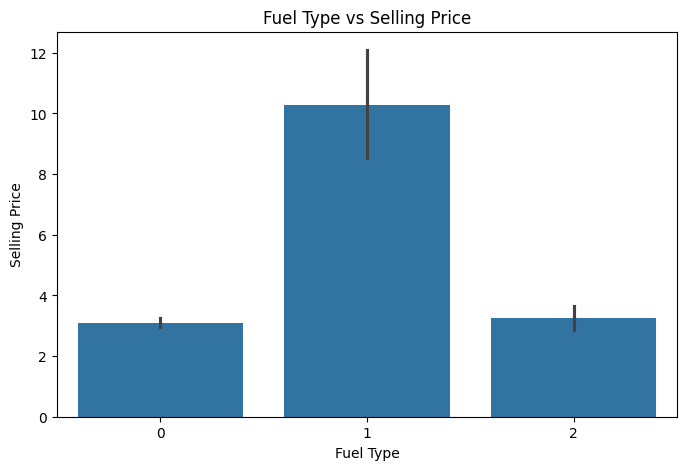

In [ ]:
# Fuel price vs Selling price
plt.figure(figsize=(8,5))
sns.barplot(x='fuel', y='selling_price', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Fuel Type vs Selling Price')
plt.show()

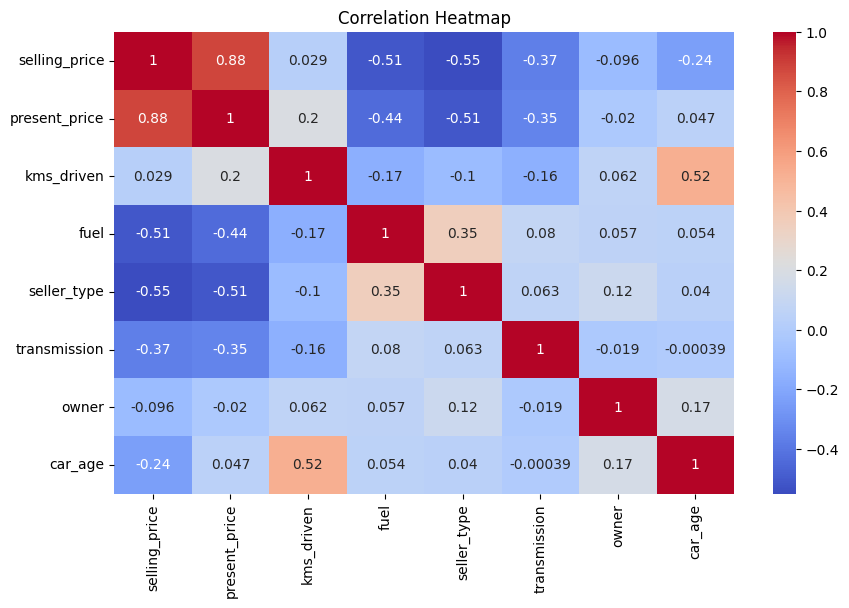

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# input fearure (X) and target column (y)
X = df[['car_age', 'kms_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
y = df['selling_price']

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# evaluate linear regression model using R2 score
from sklearn.metrics import r2_score
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 score:", r2_lr)

Linear Regression R2 score: 0.6073857033993806


In [ ]:
# Train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# evaluate Random Forest Regressor using R2 Score
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor R2 score:", r2_rf)

Random Forest Regressor R2 score: 0.8393068425382741


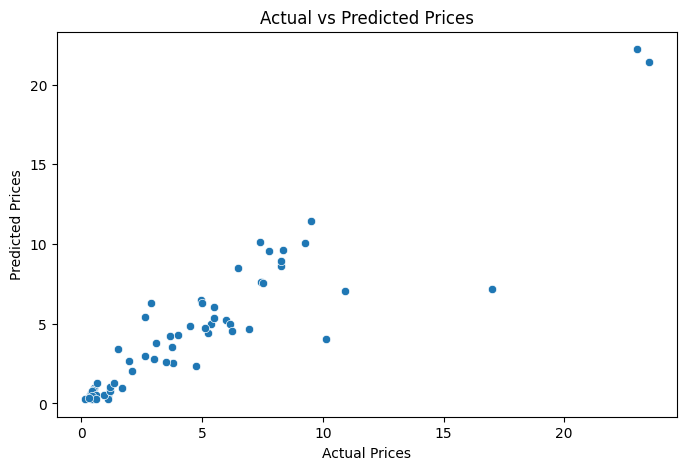

In [ ]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf )
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

/tmp/ipython-input-82-90029323.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=features[sorted_idx],palette = 'Blues_r')


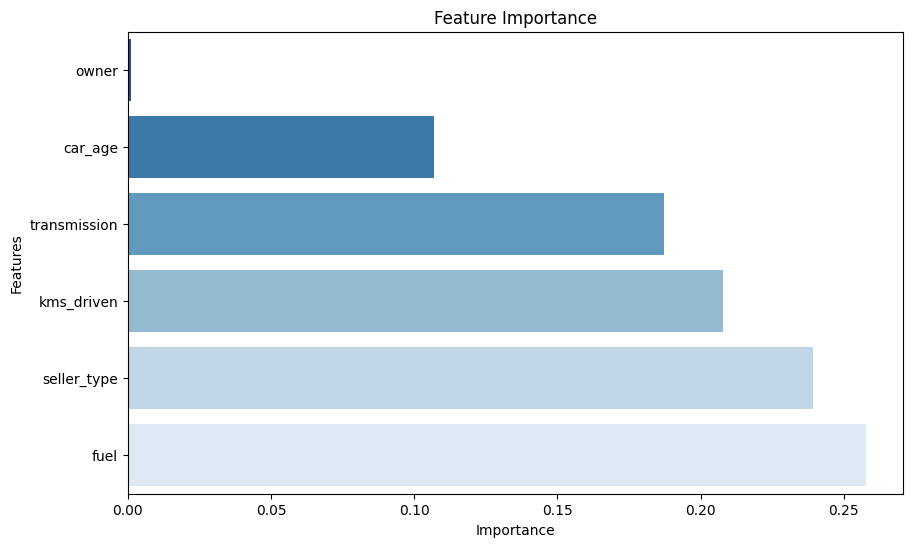

In [ ]:
# Feature Importance Plot
importances = rf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)
#Plot sorted feature importamce
plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx],palette = 'Blues_r')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()